# To Do:
<b> Execution </b>
1. how to strip dbscan clusters from df? --> need to implement within cluster df for each methodology
1. Read all datasets in within single step
2. Make TSNE not read from PCA input
3. Implement Outlier Rule Based Dataset

<b> Details: </b>
1. Remove older info such as census data -etc...
2. remove hard coded tsne/ db scane

# Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Import Data

In [4]:
repo_pca = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/principal_components/'

final_log_mm_pca_components = pd.read_csv(repo_pca + 'final_log_mm_pca_components.csv')
final_log_ss_pca_components = pd.read_csv(repo_pca + 'final_log_ss_pca_components.csv')
final_mm_pca_components = pd.read_csv(repo_pca + 'final_mm_pca_components.csv')
final_ss_pca_components = pd.read_csv(repo_pca + 'final_ss_pca_components.csv')

# DBSCAN

### Functions

In [5]:
from sklearn.manifold import TSNE

def tsne_(df):
    # grabs only first 3 components
    X = final_log_mm_pca_components.iloc[:, :3].values 

    tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(X)

    plt.scatter(X_tsne[:, 0], X_tsne[:, 1])#, c=y, cmap=plt.cm.get_cmap('jet', 10))

    plt.show()
    
    return X_tsne 

import numpy as np
from sklearn.neighbors import NearestNeighbors
def NN(df, num_neighbors):
    # n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
    nbrs = NearestNeighbors(n_neighbors = 5).fit(df)
    # Find the k-neighbors of a point
    neigh_dist, neigh_ind = nbrs.kneighbors(df)
    # sort the neighbor distances (lengths to points) in ascending order
    # axis = 0 represents sort along first axis i.e. sort along row
    sort_neigh_dist = np.sort(neigh_dist, axis = 0)
    
    return sort_neigh_dist, neigh_dist, neigh_ind 

import matplotlib.pyplot as plt
from kneed import KneeLocator
def plot_k(df, neigh_dist):
    k_dist = df[:, 4]    
    kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                          curve = "concave", direction = "increasing", online=True)

    print(kneedle.knee_y)
    kneedle.plot_knee()
    plt.show()
    
    return kneedle.knee_y


from sklearn.cluster import DBSCAN
from collections import Counter
import seaborn as sns
def dbscan_(eps_param, min_samples_param, df):
    clusters = DBSCAN(eps = 3.48, min_samples = 4).fit(df)
    # get cluster labels
    print(clusters.labels_)

    # check unique clusters
    set(clusters.labels_)
    # -1 value represents noisy points could not assigned to any cluster
    
    Counter(clusters.labels_)
    
    tnse_df = pd.DataFrame(data= df,columns=['t-SNE-1','t-SNE-2']) 

    p = sns.scatterplot(data = tnse_df, x = "t-SNE-1", y = "t-SNE-2", hue = clusters.labels_, legend = "full", palette = "deep")
    sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
    plt.show()
    
    return pd.DataFrame(data = clusters.labels_, columns=['label'])

#### DBSCAN/ T-SNE - final_log_mm_pca_components

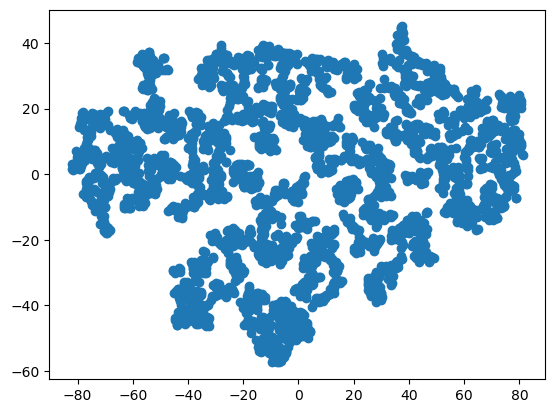

array([[ 21.596287 , -20.662296 ],
       [ 46.00689  , -11.898437 ],
       [-53.93176  ,  19.719254 ],
       ...,
       [ 20.83588  ,  -2.369123 ],
       [  1.3278469,  -6.025722 ],
       [ -1.5826384, -41.8542   ]], dtype=float32)

(array([[0.        , 0.03133426, 0.23342765, 0.43678011, 0.61752871],
        [0.        , 0.03133426, 0.27132574, 0.47642658, 0.64134064],
        [0.        , 0.03727827, 0.27132574, 0.50319425, 0.65323834],
        ...,
        [0.        , 2.32201692, 2.96379492, 3.33707403, 3.58060785],
        [0.        , 2.37566962, 3.14967402, 3.36699202, 3.58509779],
        [0.        , 2.61403638, 3.21812225, 3.39090787, 3.78297001]]),
 array([[0.        , 0.90316032, 1.33191536, 1.5090679 , 1.53793503],
        [0.        , 0.57964806, 0.68388113, 2.71657285, 2.77124015],
        [0.        , 0.76852878, 0.94547439, 1.0265982 , 1.50285901],
        ...,
        [0.        , 0.22991055, 0.96079859, 1.21100966, 1.50412713],
        [0.        , 0.19490352, 1.75449213, 2.16832472, 2.23767746],
        [0.        , 1.0120175 , 1.13919412, 1.27330663, 1.39164307]]),
 array([[   0, 3061, 3032, 3107,  734],
        [   1, 3130, 2770, 1767,  593],
        [   2, 1404, 3045,  516, 1097],
        ..

3.478042152566942


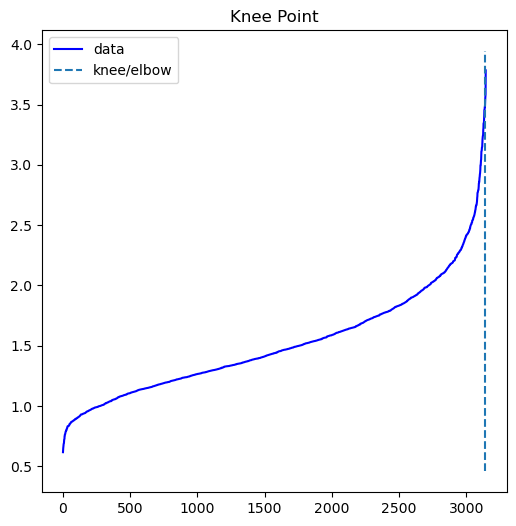

[0 1 2 ... 4 2 5]


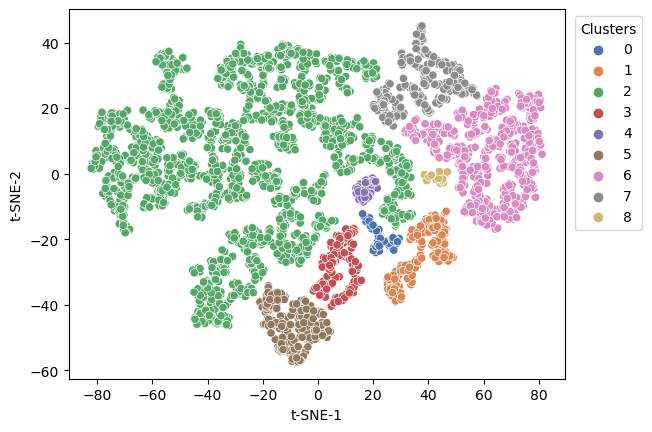

,label
0,0
1,1
2,2
3,2
4,3
...,...
3138,7
3139,6
3140,4
3141,2


In [6]:
tsne_1_log_mm = tsne_(final_log_mm_pca_components)
display(tsne_1_log_mm)

tsne_2_log_mm = NN(tsne_1_log_mm, 5)
display(tsne_2_log_mm)

tsne_3_log_mm = plot_k(tsne_2_log_mm[0], tsne_2_log_mm[1])

tsne_4_log_mm = dbscan_(tsne_3_log_mm, 4, tsne_1_log_mm)
tsne_4_log_mm

halanopis distance

https://www.analyticsvidhya.com/blog/2020/10/reduce-the-complexity-of-you-data-with-variable-clustering-from-scratch-using-sas-and-python/
group variables into classes and pick one class.

Variable Clustering  --> 

# K-Means

In [7]:
from sklearn.cluster import KMeans

def kmeans_elbow(X):
    wcss=[]
    for k in range(1,11):
        kmeans = KMeans(n_clusters=k, init='k-means++')
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(5,5))
    plt.grid()
    plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
    plt.xlabel('K Value')
    plt.ylabel('WCSS')
    return plt.show()

In [8]:
def kmeans_cluster(df, X, c_Clust):
    tmp      = df.copy()
    kmeans   = KMeans(n_clusters = c_Clust)
    clusters = kmeans.fit_predict(X)
    tmp['label'] = clusters
    return tmp

In [9]:
from mpl_toolkits.mplot3d import Axes3D

def plot_k(df): 
   
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['PC1'][df.label == 0], df['PC2'][df.label == 0],df['PC3'][df.label == 0],c='blue', s=20, label = '0')
    ax.scatter(df['PC1'][df.label == 1], df['PC2'][df.label == 1],df['PC3'][df.label == 1],c='red', s=20, label = '1')
    ax.scatter(df['PC1'][df.label == 2], df['PC2'][df.label == 2],df['PC3'][df.label == 2],c='green', s=20, label = '2')
    ax.scatter(df['PC1'][df.label == 3], df['PC2'][df.label == 3],df['PC3'][df.label == 3],c='orange', s=20, label = '3')
    ax.scatter(df['PC1'][df.label == 4], df['PC2'][df.label == 4],df['PC3'][df.label == 4],c='purple', s=20, label = '4')
    ax.view_init(30,120)

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.legend(loc="upper right")

    plt.show()

### Plot Options

In [10]:
#%pylab
%matplotlib inline

### final mm log pca 

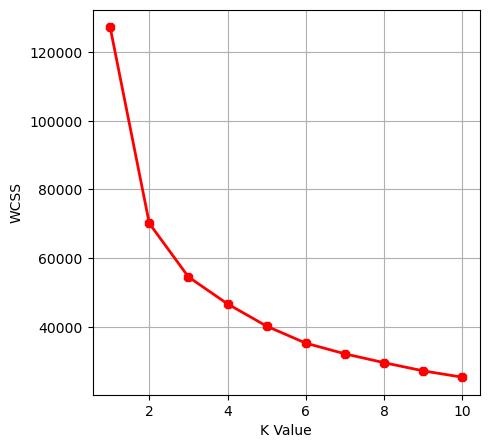

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,1.660468,-2.527098,-1.279068,-0.923121,2.182852,1.291934,-4.031925,1.537073,2.202677,1.047665,2
1,5.851065,-0.870448,-0.196122,0.173983,-0.375883,0.269863,-5.575227,1.559633,2.526158,0.864680,2
2,-5.325445,2.510663,-1.206219,-1.007899,1.987087,2.982639,-3.449843,1.023620,1.416779,0.670919,3
3,-2.508568,-1.211067,0.763118,-2.890163,1.647063,-1.397221,-4.324518,1.361861,4.724699,-0.618306,4
4,0.008062,-2.242699,-0.440432,-1.470020,0.955239,0.559951,-4.578838,2.312122,3.494554,0.271977,4
...,...,...,...,...,...,...,...,...,...,...,...
3138,2.239572,0.753930,0.727520,-2.384275,-0.215225,-0.864198,2.069560,0.234832,-2.877151,0.674932,2
3139,19.362629,2.793661,4.093737,-0.353082,-1.919528,-0.700541,-0.621765,-1.806246,-1.881853,1.772886,0
3140,3.157844,0.237973,1.090901,-0.462999,-0.860216,-1.452043,1.172930,0.552608,-2.331710,-1.179693,2
3141,1.226776,-0.536626,1.194127,-0.059504,-2.250850,0.607381,2.616718,0.734779,-1.508952,-1.571377,2


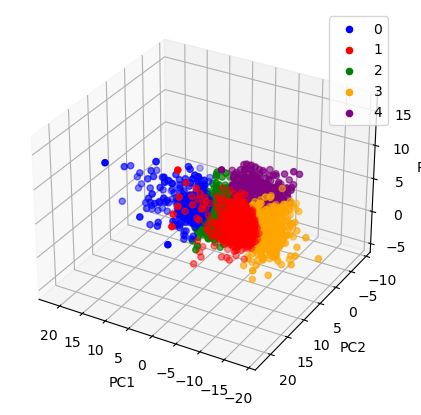

In [11]:
# grabs only first 3 components
X = final_log_mm_pca_components.iloc[:, :3].values 

# elbow curve
kmeans_elbow(X)

# k-mean algo
final_log_mm_pca_components_k = kmeans_cluster(final_log_mm_pca_components, X,5)
display(final_log_mm_pca_components_k)

# plot k-means
plot_k(final_log_mm_pca_components_k)

### final_log_ss_pca_components

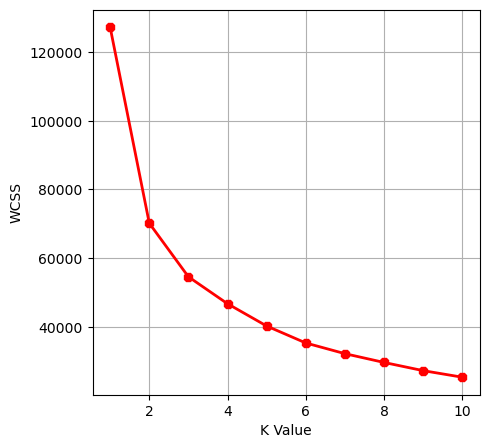

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,1.660469,-2.527219,-1.279756,-0.921698,2.194312,1.274863,-4.052467,1.507333,2.185395,1.162364,1
1,5.851066,-0.870683,-0.196300,0.175432,-0.363719,0.268944,-5.596244,1.515749,2.513462,0.898232,1
2,-5.325446,2.510645,-1.205172,-1.003572,2.006779,2.949020,-3.467124,0.983230,1.350663,0.684985,2
3,-2.508569,-1.210542,0.762052,-2.890461,1.633963,-1.392403,-4.292566,1.376218,4.796405,-0.179038,0
4,0.008061,-2.242632,-0.439160,-1.468019,0.962936,0.559106,-4.570109,2.286133,3.487485,0.340555,0
...,...,...,...,...,...,...,...,...,...,...,...
3138,2.239571,0.754145,0.726890,-2.383211,-0.209434,-0.876689,2.041849,0.224537,-2.898326,0.848999,1
3139,19.362630,2.793439,4.094681,-0.354533,-1.916007,-0.689080,-0.633031,-1.809538,-1.885569,1.585192,4
3140,3.157844,0.237874,1.090586,-0.461521,-0.859040,-1.446416,1.161506,0.538171,-2.348019,-1.337780,1
3141,1.226774,-0.536320,1.193116,-0.057234,-2.249392,0.589075,2.601321,0.740662,-1.535491,-1.473987,1


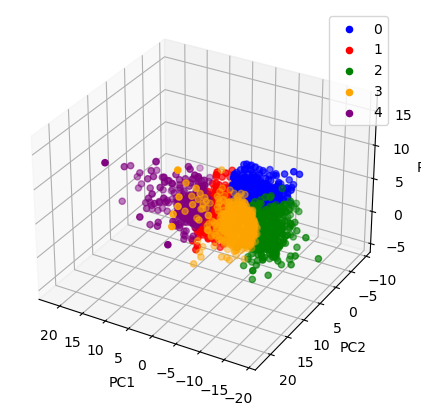

In [12]:
# grabs only first 3 components
X = final_log_ss_pca_components.iloc[:, :3].values 

# elbow curve
kmeans_elbow(X)

#%pylab
# k-mean algo
final_log_ss_pca_components_k = kmeans_cluster(final_log_ss_pca_components, X, 5)
display(final_log_ss_pca_components_k)

# plot k-means
plot_k(final_log_ss_pca_components_k)

### final_log_mm_pca_components - 25

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,1.660468,-2.527098,-1.279068,-0.923121,2.182852,1.291934,-4.031925,1.537073,2.202677,1.047665,8
1,5.851065,-0.870448,-0.196122,0.173983,-0.375883,0.269863,-5.575227,1.559633,2.526158,0.864680,16
2,-5.325445,2.510663,-1.206219,-1.007899,1.987087,2.982639,-3.449843,1.023620,1.416779,0.670919,5
3,-2.508568,-1.211067,0.763118,-2.890163,1.647063,-1.397221,-4.324518,1.361861,4.724699,-0.618306,12
4,0.008062,-2.242699,-0.440432,-1.470020,0.955239,0.559951,-4.578838,2.312122,3.494554,0.271977,8
...,...,...,...,...,...,...,...,...,...,...,...
3138,2.239572,0.753930,0.727520,-2.384275,-0.215225,-0.864198,2.069560,0.234832,-2.877151,0.674932,6
3139,19.362629,2.793661,4.093737,-0.353082,-1.919528,-0.700541,-0.621765,-1.806246,-1.881853,1.772886,18
3140,3.157844,0.237973,1.090901,-0.462999,-0.860216,-1.452043,1.172930,0.552608,-2.331710,-1.179693,17
3141,1.226776,-0.536626,1.194127,-0.059504,-2.250850,0.607381,2.616718,0.734779,-1.508952,-1.571377,6


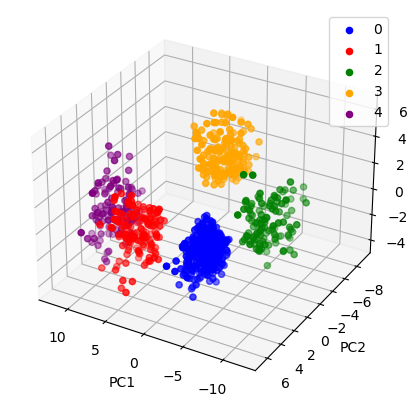

In [13]:
# grabs only first 3 components
X = final_log_mm_pca_components.iloc[:, :3].values 

# k-mean algo
final_log_mm_pca_components_k25 = kmeans_cluster(final_log_mm_pca_components, X,20)
display(final_log_mm_pca_components_k25)

# plot k-means
plot_k(final_log_mm_pca_components_k25)

### final_log_ss_pca_components - 25

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,1.660469,-2.527219,-1.279756,-0.921698,2.194312,1.274863,-4.052467,1.507333,2.185395,1.162364,1
1,5.851066,-0.870683,-0.196300,0.175432,-0.363719,0.268944,-5.596244,1.515749,2.513462,0.898232,4
2,-5.325446,2.510645,-1.205172,-1.003572,2.006779,2.949020,-3.467124,0.983230,1.350663,0.684985,0
3,-2.508569,-1.210542,0.762052,-2.890461,1.633963,-1.392403,-4.292566,1.376218,4.796405,-0.179038,5
4,0.008061,-2.242632,-0.439160,-1.468019,0.962936,0.559106,-4.570109,2.286133,3.487485,0.340555,1
...,...,...,...,...,...,...,...,...,...,...,...
3138,2.239571,0.754145,0.726890,-2.383211,-0.209434,-0.876689,2.041849,0.224537,-2.898326,0.848999,12
3139,19.362630,2.793439,4.094681,-0.354533,-1.916007,-0.689080,-0.633031,-1.809538,-1.885569,1.585192,6
3140,3.157844,0.237874,1.090586,-0.461521,-0.859040,-1.446416,1.161506,0.538171,-2.348019,-1.337780,18
3141,1.226774,-0.536320,1.193116,-0.057234,-2.249392,0.589075,2.601321,0.740662,-1.535491,-1.473987,12


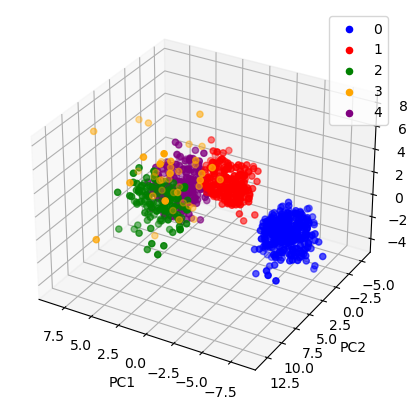

In [14]:
# grabs only first 3 components
X = final_log_ss_pca_components.iloc[:, :3].values 

#%pylab
# k-mean algo
final_log_ss_pca_components_k25 = kmeans_cluster(final_log_ss_pca_components, X,20)
display(final_log_ss_pca_components_k25)

# plot k-means
plot_k(final_log_ss_pca_components_k25)

# Merge Results onto original datasets

Final Merge

In [16]:
repo_d = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/'

final_data = pd.read_csv(repo_d + 'final_data.csv')

final_data = final_data.join(final_log_mm_pca_components_k[['label']].rename(columns={'label':'Cluster_1'})) \
                       .join(final_log_ss_pca_components_k[['label']].rename(columns={'label':'Cluster_2'})) \
                       .join(final_log_mm_pca_components_k25[['label']].rename(columns={'label':'Cluster_3'}))     \
                       .join(final_log_ss_pca_components_k25[['label']].rename(columns={'label':'Cluster_4'}))     \
                       .join(tsne_4_log_mm.rename(columns={'label':'Cluster_5'}))                          

final_data.to_csv(r'C:\Users\Mattl\Desktop\Data\final\final_data_segmented.csv', index = False)

final_data

,fips,county_name,state,attained_bachelors,attained_doctorate,attained_masters,attained_professional,black,black_homeowners,eight_rooms,...,house_price_avg_q2_2022,house_price_avg_q3_2022,house_price_avg_q4_2022,house_price_avg_q1_2023,house_price_avg_2022,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5
0,1001,Autauga County,Alabama,0.164260,0.011713,0.092114,0.013228,0.196844,0.560549,0.104427,...,2.134948e+05,2.179221e+05,2.186639e+05,2.216174e+05,2.139502e+05,2,1,8,1,0
1,1003,Baldwin County,Alabama,0.206072,0.013829,0.085716,0.018885,0.086950,0.628894,0.097632,...,3.437913e+05,3.526471e+05,3.535281e+05,3.538124e+05,3.445041e+05,2,1,16,4,1
2,1005,Barbour County,Alabama,0.067352,0.006168,0.028897,0.009114,0.472465,0.540083,0.059827,...,1.209975e+05,1.239684e+05,1.234504e+05,1.285342e+05,1.222997e+05,3,2,5,0,2
3,1007,Bibb County,Alabama,0.079467,0.004235,0.029644,0.005792,0.218856,0.597826,0.070010,...,1.616551e+05,1.662108e+05,1.652471e+05,1.700634e+05,1.626990e+05,4,0,12,5,2
4,1009,Blount County,Alabama,0.093022,0.004426,0.044556,0.007033,0.012669,0.890756,0.097077,...,1.960095e+05,1.994517e+05,1.985796e+05,2.040660e+05,1.952627e+05,4,0,8,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,Sweetwater County,Wyoming,0.124101,0.008125,0.046017,0.015674,0.011281,0.454545,0.083029,...,2.438263e+05,2.467218e+05,2.487840e+05,2.521160e+05,2.447855e+05,2,1,6,12,7
3139,56039,Teton County,Wyoming,0.382694,0.020896,0.147007,0.028088,0.007119,0.000000,0.064127,...,1.558608e+06,1.554250e+06,1.562388e+06,1.638108e+06,1.531451e+06,0,4,18,6,6
3140,56041,Uinta County,Wyoming,0.123177,0.005894,0.042847,0.007632,0.002535,0.275862,0.118608,...,2.730796e+05,2.818010e+05,2.852360e+05,2.877270e+05,2.746388e+05,2,1,17,18,4
3141,56043,Washakie County,Wyoming,0.172414,0.003319,0.072100,0.013830,0.000129,NaN,0.136648,...,2.218298e+05,2.272008e+05,2.301036e+05,2.342385e+05,2.232841e+05,2,1,6,12,2
